<a href="https://colab.research.google.com/github/tiagopessoalima/covid-19/blob/master/COVID_19_(Brasil).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORTANDO BIBLIOTECAS**

In [0]:
import numpy as np
import pandas as pd

**FUNÇÕES AUXILIARES**

In [0]:
def estado_situacao(estados, estado, situacao):
  df = estados.loc[estados.state==estado,:]
  df = df.groupby('date').sum()[situacao]
  df = df.reset_index()
  df = df.drop('date', axis=1)
  df.columns = [estado]
  return df

In [0]:
def plotar_status(regiao, estados, status):
  df = pd.DataFrame()
  for estado in regiao:
    df = pd.concat([df, estado_situacao(estados, estado, status)], 
                   ignore_index=False, axis=1)
  df.plot()

**CARREGANDO DADOS**

In [0]:
br = pd.read_csv('https://brasil.io/dataset/covid19/caso?format=csv')
estados = br.loc[br.place_type=='state',:]

**CENTRO-OESTE**

In [0]:
centro_oeste = ['DF','GO','MS','MT']

- Confirmados

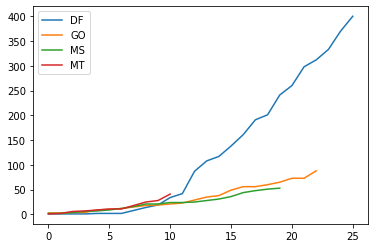

In [6]:
plotar_status(centro_oeste, estados, 'confirmed')

- Mortes

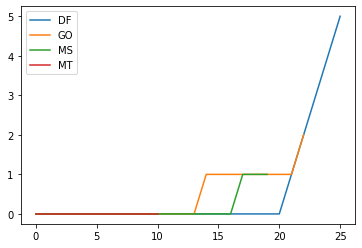

In [7]:
plotar_status(centro_oeste, estados, 'deaths')


**NORDESTE**

In [0]:
nordeste = ['AL', 'CE', 'MA', 'PI', 'PE', 'PB', 'RN', 'SE']

- Confirmados

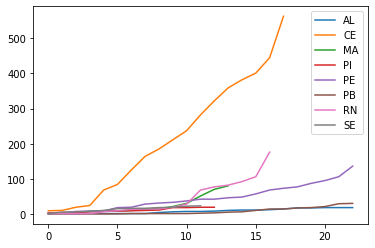

In [9]:
plotar_status(nordeste, estados, 'confirmed')

- Mortes

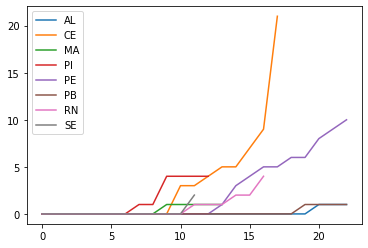

In [10]:
plotar_status(nordeste, estados, 'deaths')

**NORTE**

In [0]:
norte = ['AC','AM','AP','PA','RO','RR','TO']

- Confirmados

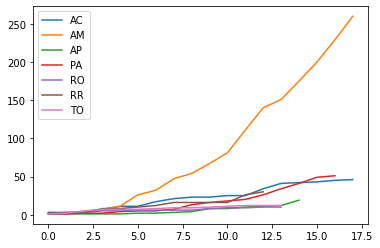

In [12]:
plotar_status(norte, estados, 'confirmed')

- Mortes

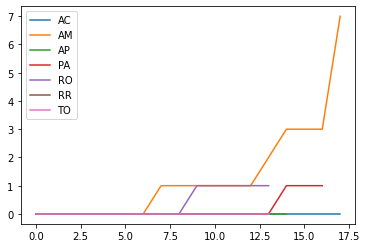

In [13]:
plotar_status(norte, estados, 'deaths')

**SUDESTE**

In [0]:
sudeste = ['ES','MG','RJ','SP']

- Confirmados

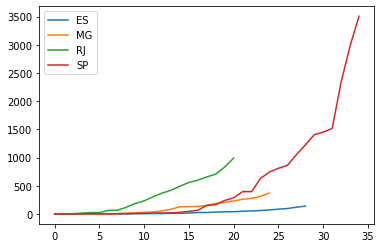

In [15]:
plotar_status(sudeste, estados, 'confirmed')

- Mortes

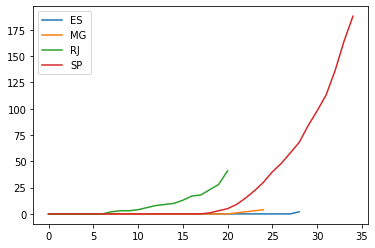

In [16]:
plotar_status(sudeste, estados, 'deaths')

**SUL**

In [0]:
sul = ['PR','RS','SC']

- Confirmados

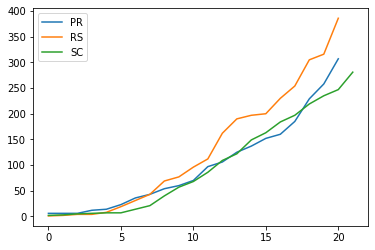

In [18]:
plotar_status(sul, estados, 'confirmed')

- Mortes

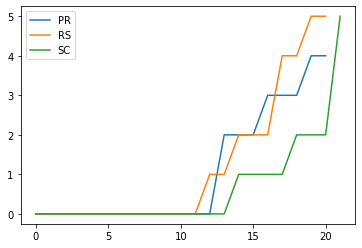

In [19]:
plotar_status(sul, estados, 'deaths')